In [150]:
import torch
import numpy as np

 ## Задание 1
 ###  Аппроксимировать нейронной сетью зависимость $y = f(x)$. Нейронная сеть - это последовательность только матричных операций.  
 Поледовательность операций:
 1. $ W1: R^1 \rightarrow R^4 $ - матричное умножение
 2. $ W2: R^4 \rightarrow R^4 $
 3. $ W3: R^4 \rightarrow R^1 $

#### Исходные данные

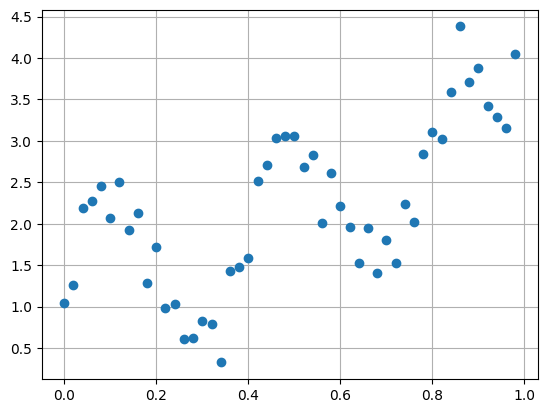

In [151]:
x = torch.arange(0,1,0.02)
x.unsqueeze_(1)
target = 2*x + 1 + torch.randn(x.shape)/3 + torch.sin(x*16)
import matplotlib.pyplot as plt
plt.plot(x,target,'o')
plt.grid(True)

Параметры нейронной сети

In [152]:
W1 = torch.randn(1,4,requires_grad=True)
W2 = torch.randn(4,4,requires_grad=True)
W3 = torch.randn(4,1,requires_grad=True)



### Forward. Описываем как сигнал идет в прямом направлении по нс. На вход подаем X, выход НС - y

In [153]:
def forward(W1,W2,W3,input):
    out1 = input@W1
    out2 = out1@W2
    out3 = out2@W3
    return out3

### Backward: обучение НС, т.е. ошибка на выходе НС распостраняется в обратном направлении по параметрам

In [154]:
alpha = 0.0001
for i in range(200):
    y = forward(W1,W2,W3,x)
    loss = torch.sum((y-target)**2)
    loss.backward()
    with torch.no_grad():
        W1 -= alpha*W1.grad
        W2 -= alpha*W2.grad
        W3 -= alpha*W3.grad
    W1.grad.zero_()
    W2.grad.zero_()
    W2.grad.zero_()
    if i%50 == 0:
        print(loss.detach())

tensor(1179.7538)
tensor(45.4478)
tensor(45.4539)
tensor(45.4477)


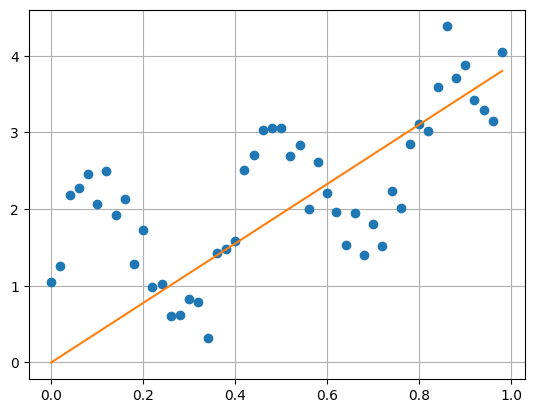

In [155]:
Y = forward(W1,W2,W3,x).detach()
plt.plot(x,target,'o')
plt.plot(x,Y)
plt.grid(True)


 ## Задание 2
 В предыдущем примере мы подобрали исходную зависимость линейной функцией, т.к. в нейронной сети использовались только линейные преобразования. Хотя в НС мы использовали 3 слоя (3 матричных операции), в силу линейности операций, мы с таким же успехом могли применить только одну линейную операции или одно матричное умножение и получили бы идентичный результат.  
 Теперь давайте попробуем добавить нелинейность
 ###  Аппроксимировать нейронной сетью зависимость $y = f(x)$. Нейронная сеть - это последовательность матричных операций с нелинейной активацией.  
 Поледовательность операций:
 1. $ W1: R^1 \rightarrow R^4 $ - матричное умножение
 2. Нелинейное преобразование (попробовать разные функции, например sin, exp, sigmoid, etc) 
 3. $ W2: R^4 \rightarrow R^4 $
 4. Нелинейное преобразование (попробовать разные функции, например sin, exp, sigmoid, etc)
 5. $ W3: R^4 \rightarrow R^1 $

In [156]:
W1 = torch.randn(1,4,requires_grad=True)
W2 = torch.randn(4,4,requires_grad=True)
W3 = torch.randn(4,1,requires_grad=True)

In [157]:
def forward(W1,W2,W3,input):
    out1 = input@W1
    out1 = torch.sin(out1)
    out2 = out1@W2
    out2 = torch.sin(out2)
    out3 = out2@W3
    return out3

In [ ]:
alpha = 0.0001
for i in range(2000):
    y = forward(W1,W2,W3,x)
    loss = torch.sum((y-target)**2)
    loss.backward()
    with torch.no_grad():
        W1 -= alpha*W1.grad
        W2 -= alpha*W2.grad
        W3 -= alpha*W3.grad
    W1.grad.zero_()
    W2.grad.zero_()
    W2.grad.zero_()
    if i%200 == 0:
        print(loss.detach())

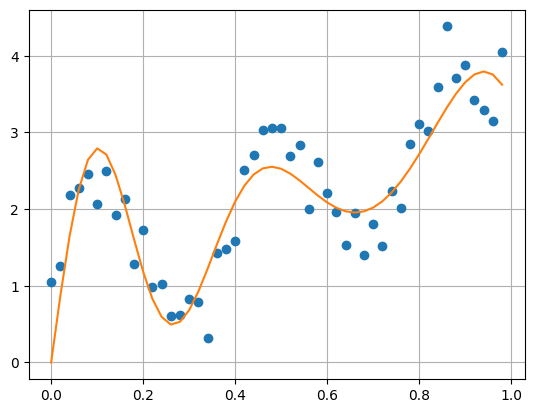

In [183]:
Y = forward(W1,W2,W3,x).detach()
plt.plot(x,target,'o')
plt.plot(x,Y)
plt.grid(True)
